## Download automático de dados financeiros

<br>
<br>

É preciso instalar os pacotes: 
- pandas_datareader: para baixar dados do Yahoo Finance e do Google Finance. 
- quandl: para baixar dados do Banco Central (taxas de juros, taxas de inflação etc.).

Há duas maneiras de instalá-los: 

1- Você pode digitar no terminal (Anaconda Prompt ou PowerShell):

> pip install pandas_datareader quandl

2- Ou executar a célula abaixo:

In [14]:
!pip install pandas_datareader quandl

<br>
<br>
O [Yahoo Finanças](finance.yahoo.com) é o mais completo.

**Atenção**: o site às vezes não responde, se algum comando abaixo não funcionar, tente mais de uma vez.
<br>
<br>

Como sempre, o primeiro passo é carregar os pacotes.

<br>

In [63]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas_datareader as pdr
import quandl
import datetime 

sns.set(style='whitegrid')


Vamos começar analisando o desempenho das ações do Magazine Luíza.   
Para baixar os dados, basta usar o seguinte comando:

In [97]:
magazine = pdr.get_data_yahoo('MGLU3.SA')

In [98]:
magazine.head() # para mostrar apenas as primeiras linhas do dataframe

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-05-02,16.10,16.600000,16.100000,16.450001,14.925865,8750100.0
2011-05-03,16.50,16.690001,16.200001,16.299999,14.789761,1052200.0
2011-05-04,16.32,16.480000,16.320000,16.480000,14.953083,1225100.0
2011-05-05,16.41,16.410000,16.320000,16.379999,14.862348,1096800.0
2011-05-06,16.35,16.379999,16.000000,16.260000,14.753469,1208500.0


<br>
<br>

Para fazer um gráfico, basta digitar:

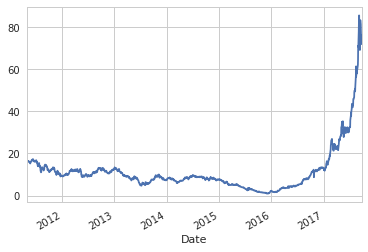

In [7]:
magazine.Close.plot();

Para modificar o tamanho do gráfico, a espessura e a cor da linha:

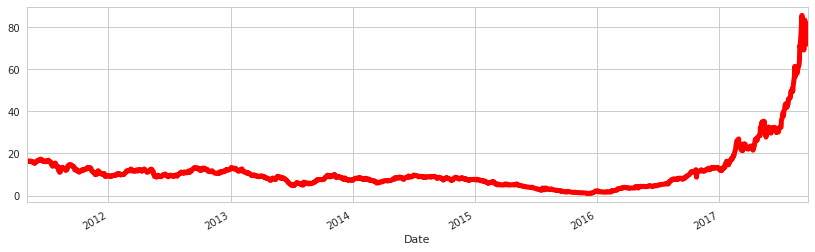

In [8]:
magazine.Close.plot(figsize=(14, 4), linewidth=5, color='red');

É possível fazer todos os passos de uma vez só:

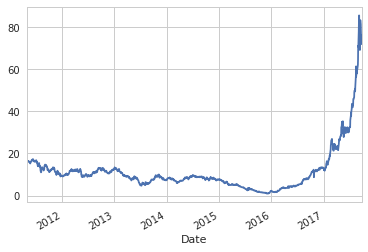

In [5]:
pdr.get_data_yahoo('MGLU3.SA')['Close'].plot();

Se preferir baixar os dados apenas de determinado período:

In [28]:
começo = datetime.datetime(2016, 1, 1)
fim = datetime.datetime(2017, 8, 31)

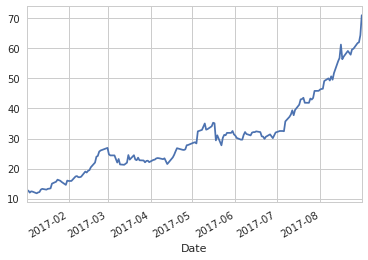

In [4]:
magazine2 = pdr.get_data_yahoo('MGLU3.SA', começo, fim)

magazine2.Close.plot();

<br>
<br>
É possível baixar dados de várias empresas ao mesmo tempo.   
Por exemplo, vamos analisar os dados da JBS, da Petrobrás, do Itaú e do Bradesco, além do Magazine Luíza  
(para consultar outras empresas, basta pesquisar a sigla correpondente no site do Yahoo):

<br>

In [80]:
símbolos = ['MGLU3.SA', 'JBSS3.SA', 'PETR3.SA', 'ITUB4.SA', 'BBDC4.SA']

dados = pdr.get_data_yahoo(símbolos)

dic = dict()

for i in símbolos:
    dic[i] = dados.loc['Close', :, i]

dados = pd.DataFrame(dic)

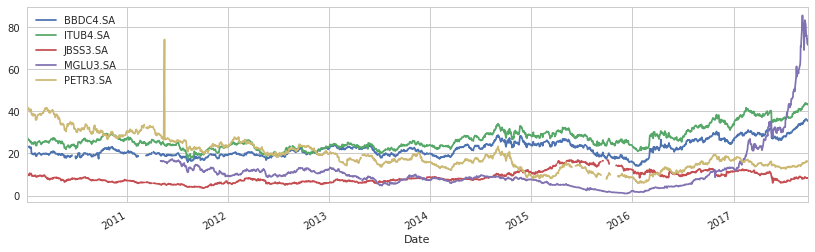

In [89]:
dados.plot(figsize=(14, 4));

O excelente desempenho das ações do Magazine Luíza atrapalha a ver o mau desempenho recente das ações da JBS e da Petrobrás. Para analisar cada caso separadamente, faça o seguinte: 

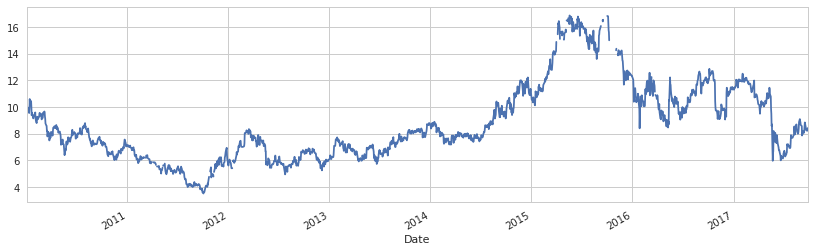

In [93]:
dados.loc[:, 'JBSS3.SA'].plot(figsize=(14, 4));

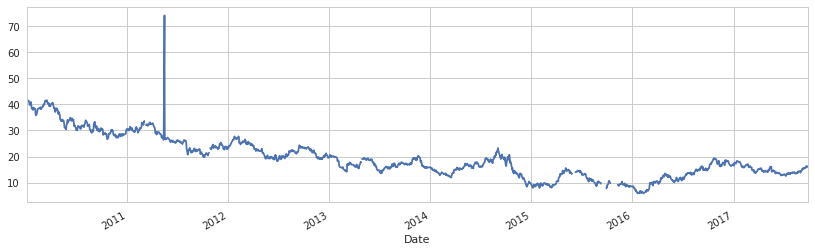

In [94]:
dados.loc[:, 'PETR3.SA'].plot(figsize=(14, 4));

Para ver o índice Bovespa:

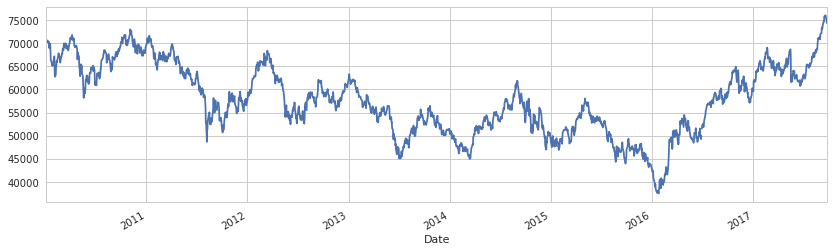

In [37]:
pdr.get_data_yahoo('^BVSP')['Close'].plot(figsize=(14, 4));

<br>
<br>

## Google Finance

O site [Google Finance](https://finance.google.com/finance) também fornece dados financeiros. Em geral, o período coberto é menor do que aquele do Yahoo, mas talvez você encontre coisas que não estão disponíveis lá.

A lógica dos comandos é a mesma, mas as siglas são um pouco diferentes.

<br>
<br>

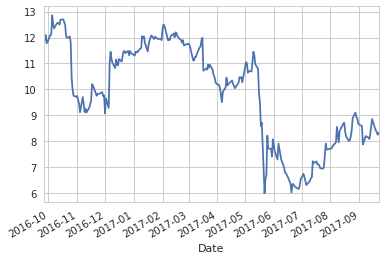

In [9]:
pdr.get_data_google('BVMF:JBSS3')['Close'].plot();

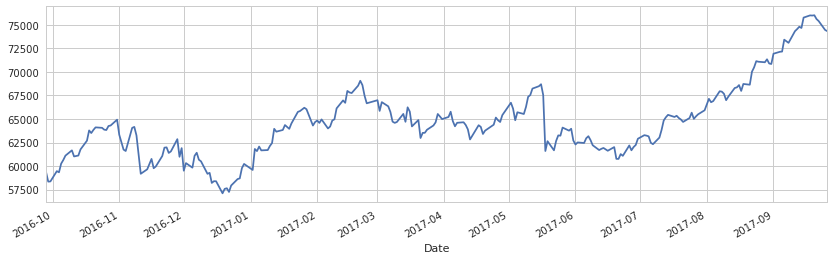

In [71]:
pdr.get_data_google('INDEXBVMF:IBOV')['Close'].plot(figsize=(14, 4));

## Estatísticas do Banco Central


Para conseguir esses dados, é preciso usar o pacote `Quandl`.   
A lista dos dados disponíveis está [aqui](https://www.quandl.com/data/BCB-Central-Bank-of-Brazil-Statistical-Database).

O site Quandl limita a quantidade de downloads em um curto espaço de tempo, por isso, espere 10-30 segundos para executar novos comandos. 

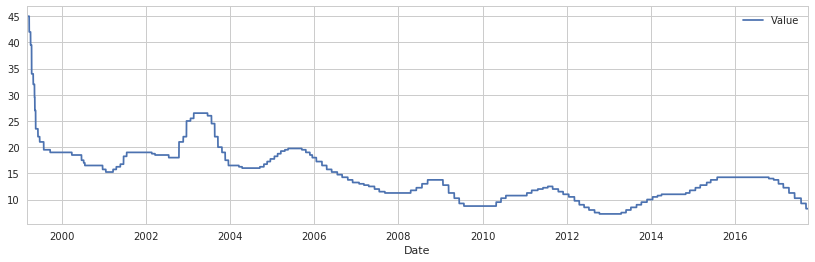

In [66]:
quandl.get('BCB/432').plot(figsize=(14, 4)); # taxa Selic

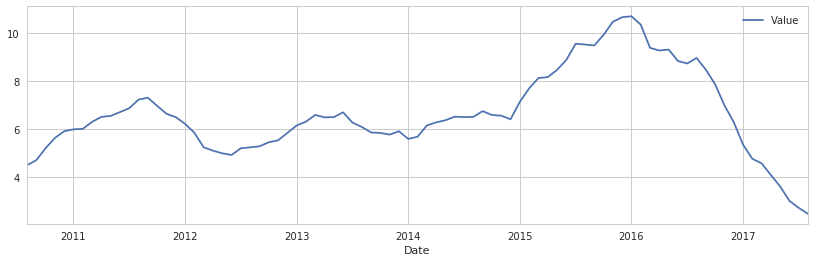

In [68]:
quandl.get('BCB/13522', start_date="2010-08-31").plot(figsize=(14, 4)); # IPCA 